### 过拟合

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

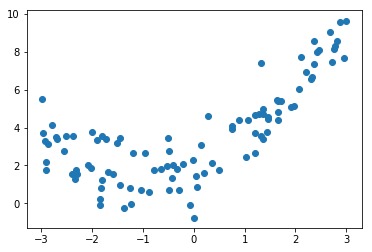

In [10]:
plt.scatter(x, y)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', lin_reg)
    ])

In [12]:
from sklearn.metrics import mean_squared_error

poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6875653386073417

[-3, 3, -1, 10]

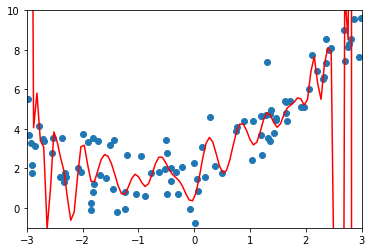

In [13]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])

In [17]:
### 过拟合参数效果，方程系数大小区别明显
lin_reg.coef_

array([ 1.21093453e+12,  1.19201058e+01,  1.78866778e+02, -2.95982239e+02,
       -1.79531449e+04, -1.54155026e+04,  8.34383275e+05,  8.19774040e+05,
       -2.23627851e+07, -1.44771550e+07,  3.87211418e+08,  1.13421075e+08,
       -4.61600312e+09, -1.25081500e+08,  3.93150405e+10, -5.47576783e+09,
       -2.44176251e+11,  5.46288687e+10,  1.11421043e+12, -2.76406465e+11,
       -3.71329259e+12,  8.55454910e+11,  8.80960803e+12, -1.60748867e+12,
       -1.39204160e+13,  1.49444708e+12,  1.19236879e+13,  2.47473078e+11,
        4.42409192e+11, -1.64280930e+12, -1.05153597e+13, -1.80898850e+11,
        3.00205050e+12,  2.75573418e+12,  8.74124345e+12, -1.36695399e+12,
       -1.22671920e+12, -7.00432918e+11, -8.24895441e+12, -8.66296094e+11,
       -2.75689092e+12,  1.39625207e+12,  6.26145077e+12, -3.47996079e+11,
        6.29123725e+12,  1.33768276e+12, -6.11902467e+11,  2.92339250e+11,
       -6.59758587e+12, -1.85663192e+12, -4.13408727e+12, -9.72012429e+11,
       -3.99030817e+11, -

In [23]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

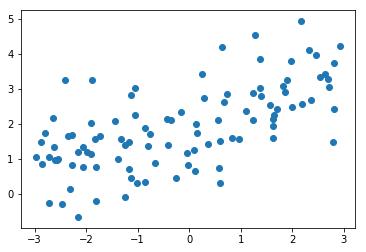

In [21]:
plt.scatter(x, y)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', lin_reg)
    ])

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
from sklearn.metrics import mean_squared_error

poly20_reg = PolynomialRegression(degree=20)
poly20_reg.fit(X_train, y_train)
y20_predict = poly20_reg.predict(X_test)
mean_squared_error(y_test, y20_predict)

167.94010860023363

[-3, 3, 0, 6]

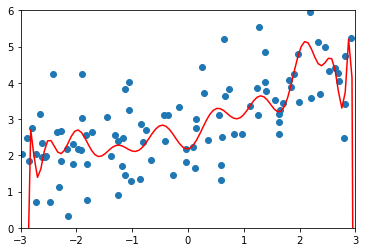

In [40]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly20_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])

In [42]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])

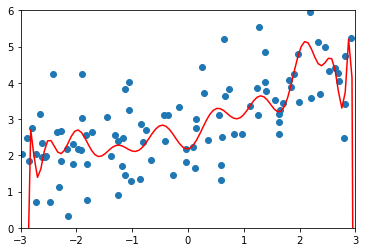

In [43]:
plot_model(poly20_reg)

### 使用岭回归

In [44]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

In [49]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)
### 比原先167.94010860023363好太多

1.3233492754070724

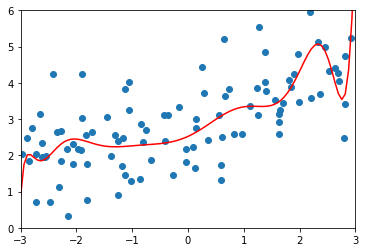

In [50]:
plot_model(ridge1_reg)

In [55]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218448

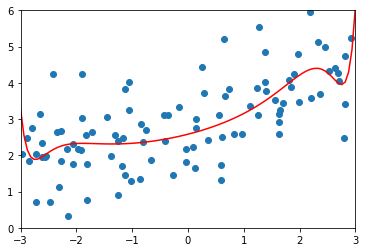

In [56]:
plot_model(ridge2_reg)

In [63]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

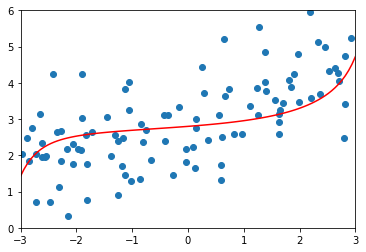

In [64]:
plot_model(ridge3_reg)

In [65]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408455590998372

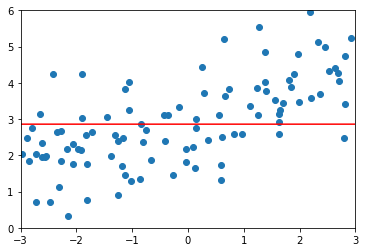

In [66]:
plot_model(ridge4_reg)